In [1]:
import numpy as np
import pandas as pd
import gensim, logging
import gensim.downloader as api
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, TruncatedSVD

from utils import classification_metrics

In [2]:
import os

def load_data():
    path = os.path.join("./word2vec-google-news-300.gz")
    model = KeyedVectors.load_word2vec_format(path, binary=True)
    return model

In [4]:
train = pd.read_csv('./data/processed_data.csv')

train = train[['X', 'Output']]
train = train.dropna()

In [5]:
model = load_data()

In [6]:
temp = []
for _, document in train.iterrows():
    document_embedding = []
    for word in document['X'].split(' '):
        try:
            word_embedding = model.wv.__getitem__(word)
            document_embedding.append((word_embedding))
        except:
            pass
    temp.append([document['X'], document_embedding, document['Output']])

/home/bipinkc/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [7]:
data = pd.DataFrame(temp, columns=['X', 'embeddings', 'y'])

In [8]:
data['len'] = data['embeddings'].apply(len)

In [9]:
data = data[data['len']>0]

In [10]:
data['processed'] = list(map(lambda x: np.array(x).mean(0), data['embeddings']))

In [11]:
x = []
for i in data['processed']:
    x.append(i)

In [12]:
x = np.array(x)

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, data['y'], test_size=0.2, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(122145, 300), (30537, 300)]


In [ ]:
classifier = LogisticRegression(penalty='l1', solver='liblinear')
parameters = {'C':[0.1, 1, 10, 50, 100, 200, 400]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_log_loss',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_cross_entropy_loss = grid_search.best_score_

In [ ]:
best_cross_entropy_loss, best_parameters

In [14]:
lg = LogisticRegression(penalty='l1', C=10)
lg.fit(X_train, y_train)

/home/bipinkc/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

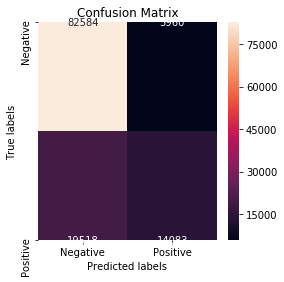

Train 

accuracy:     0.79 
sensitivity:  0.42 
specifity:    0.93
[[82584  5960]
 [19518 14083]]


In [15]:
classification_metrics(y_train, lg.predict(X_train), msg = 'Train')

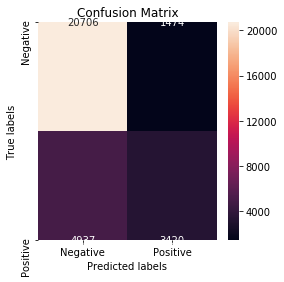

Test 

accuracy:     0.79 
sensitivity:  0.41 
specifity:    0.93
[[20706  1474]
 [ 4937  3420]]


In [16]:
classification_metrics(y_test, lg.predict(X_test), msg = 'Test')